# Project 2 - Ames Housing Data and Kaggle Challenge

Welcome to Project 2! It's time to start modeling.


### Business problem: 
Our real estate agency in Ames, Iowa, is working on a solution to help our in-house real estate agents in comparative market analysis to determine a fair and competitive offering price. With our model, we plan to support our in-house real estate agents in the following areas:

1) offer proprietary estimate of a property’s value based on the key features of the property

2) a useful reference point in assessing the fairness of a home’s price


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering & Additional Changes](#Feature-Engineering-&-Additional-changes)
- [Data Preparation](#Data-Peparation)
- [Modelling](#Modelling)
- [Improving Model](#Improving-Model)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


###  Datasets available
There are 3 datasets included in the data folder for this project. 
* [`test`](./datasets/test.csv): test data
* [`train`](./datasets/train.csv): train data
* [`sample_sub_reg`](./datasets/sample_sub_reg.csv): sample data for kaggle submission

In [1]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# 1.  Data Import and Cleaning
__________________________________________________________________________________________________________________________

In [2]:
#Import CSV 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [3]:
# test data rows and column numbers are not matching the training data
print("Train data shape", train_data.shape)
print("Test data shape", test_data.shape)

Train data shape (2051, 81)
Test data shape (878, 80)


In [4]:
#view the training data
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
#view the test data
test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
#Saleprice is in training data, but not in the test data
[col for col in train_data.columns if col not in test_data.columns]

['SalePrice']

In [7]:
#View the column names in the training data
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

# 1.2 Evaluating null values 

While there are many null values in this data, the null values could mean that the data is not available instead of assuming that the data was inputted incorrectly. Since there are many null values in certain columns, it is not reasonable to drop all columns. 

For example: Bsmt Qual (Ordinal): Evaluates the height of the basement

Not all houses will include basements. In this situation, we should keep this data and input 'none' instead. 

In [8]:
#Check for any columns with null values
nullvalues = train_data.isnull().sum()
print(nullvalues[nullvalues > 0])

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64


There are 22 rows with missing values in Mas Vnr Type and Mas Vnr Area and the 22 missing values match for both columns.
For Mas Vnr Type and Mas Vnr Area with null values, we can assume that these houses do not have Masonry veneer type.
Hence, the type and area is not available. As such, these values will be inputted as 0 instead of removing the null values. 

In [9]:
#checking to see if the null values for Mas Vnr Type and Mas Vnr Area correspond with each other. 
train_data[train_data[['Mas Vnr Area','Mas Vnr Type']].isnull().any(axis=1)][[ 'Mas Vnr Area', 'Mas Vnr Type']]


,Mas Vnr Area,Mas Vnr Type
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [10]:
#checking to see if the null values in garage type and garage yr built and garage finish correspond with each other 
train_data[train_data[['Garage Type','Garage Yr Blt', 'Garage Finish']].isnull().any(axis=1)]\
[[ 'Garage Type', 'Garage Yr Blt', 'Garage Finish']]

,Garage Type,Garage Yr Blt,Garage Finish
28,NaN,NaN,NaN
53,NaN,NaN,NaN
65,NaN,NaN,NaN
79,NaN,NaN,NaN
101,NaN,NaN,NaN
...,...,...,...
1991,NaN,NaN,NaN
2010,NaN,NaN,NaN
2027,NaN,NaN,NaN
2039,NaN,NaN,NaN


In [11]:
#e.g. BSMT Qual is missingg 55 values.
#through value counts,there are no counts for the NA values but NA is a category in the variable description
#With the assumption that the null counts could have been NA, the null counts will be readjusted as None instead.
train_data['Bsmt Qual'].value_counts()


TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [12]:
train_data['Bsmt Qual'].isnull().sum()

55

In [13]:
#the null values for BsmtFin SF 1 is only 1 count. 
# the null values will be removed 
train_data['BsmtFin SF 1'].isnull().sum()

1

In [14]:
#e.g.Fence is missing 1651 values
#through value counts,there are no counts for the NA values but NA is a category in the variable description
#With the assumption that the null counts could have been NA, the null counts will be readjusted as None instead.
train_data['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

# 1.3 Decisions on the columns with Null Values 
After looking at each individual column and evaluating the null values - the following below are the decisions I have made for each column.

Rows with one or 2 null values, I will be removing them.
Rows with 

| features | null_values | decision |
| --- | --- | --- |
| Lot_Frontage| 330|Drop column|
|Alley | 1911| Input 'None'|
|Mas Vnr Type | 22 | Input 'None'|
|Mas Vnr Area| 22| Input 0'|
|Bsmt Qual	|55|Input 'None'|
|Bsmt Cond|55|Input 'None'|
|Bsmt Exposure|58|Input 'None'|
|BsmtFin Type 1| 55| Input 'None'|
|BsmtFin SF 1| 1 | Remove row|
|BsmtFin Type 2|56| Input 'None'|
|BsmtFin SF 2|1| Remove row|
|Bsmt Unf SF|1| Remove row|
|Total Bsmt SF|1| Remove row|
|Bsmt Full Bath|2|Remove row|
|Bsmt Half Bath|2|Remove row|
|Fireplace Qu|1000|Input 'None'|
|Garage Type|113|Input 'None'|
|Garage Yr Blt|114|Input 'None'|
|Garage Finish|114|Input 'None'|
|Garage Cars|1| Remove row|
|Garage Area|1| Remove row|
|Garage Qual|114|Input 'None'|
|Garage Cond|114|Input 'None'|
|Pool QC|2042|Input 'None'|
|Fence|1651|Input 'None'|
|Misc Feature|1986|Input 'None'|


In [15]:
drop_col = ['Lot Frontage']
remove_row = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', \
              'Garage Cars', 'Garage Area']
impute_0 = ['Mas Vnr Area'] 
impute_na = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', \
              'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC',\
             'Fence', 'Misc Feature']

In [16]:
#drop columns 
[train_data.drop(col, axis=1, inplace=True) for col in drop_col]

#drop rows
train_data.dropna(subset=remove_row, inplace=True)

#Input 0 
train_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[train_data[col].fillna( 'None', inplace = True) for col in impute_na]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# 2 Exploratory Data Analysis
# 2.1 Identifying Categorical Features

In [17]:
#identify categorical columns
#Filtering out features with dtypes that are 'object'

object_cols = train_data.loc[:, train_data.dtypes == 'O']
object_cols

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,Attchd,1976.0,RFn,TA,TA,Y,None,None,None,WD
1,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,Attchd,1997.0,RFn,TA,TA,Y,None,None,None,WD
2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Detchd,1953.0,Unf,TA,TA,Y,None,None,None,WD
3,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,BuiltIn,2007.0,Fin,TA,TA,Y,None,None,None,WD
4,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Detchd,1957.0,Unf,TA,TA,N,None,None,None,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,Attchd,2007.0,Fin,TA,TA,Y,None,None,None,WD
2047,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Detchd,1961.0,Unf,TA,TA,Y,None,None,None,WD
2048,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,Detchd,1929.0,Unf,Fa,Fa,Y,None,None,None,WD
2049,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,1956.0,Unf,TA,TA,Y,None,None,None,WD


In [18]:
#View the columns names for object_cols
object_cols.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Sale Type'],
      dtype='object')

# 2.2 Columns which are not features of a house will be dropped. 

### 1) Sale Condition


In [19]:
#Sale Condition is not a feature of a house and will be dropped 
object_cols.drop(['Sale Type'], axis = 1, inplace = True)

C:\Users\wongs\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
#Check to see if Sale Type is still in object_cols
object_cols.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

# 2.3 Plotting of visualisations for categorical features

<ipython-input-21-173d2ea56f9b>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))


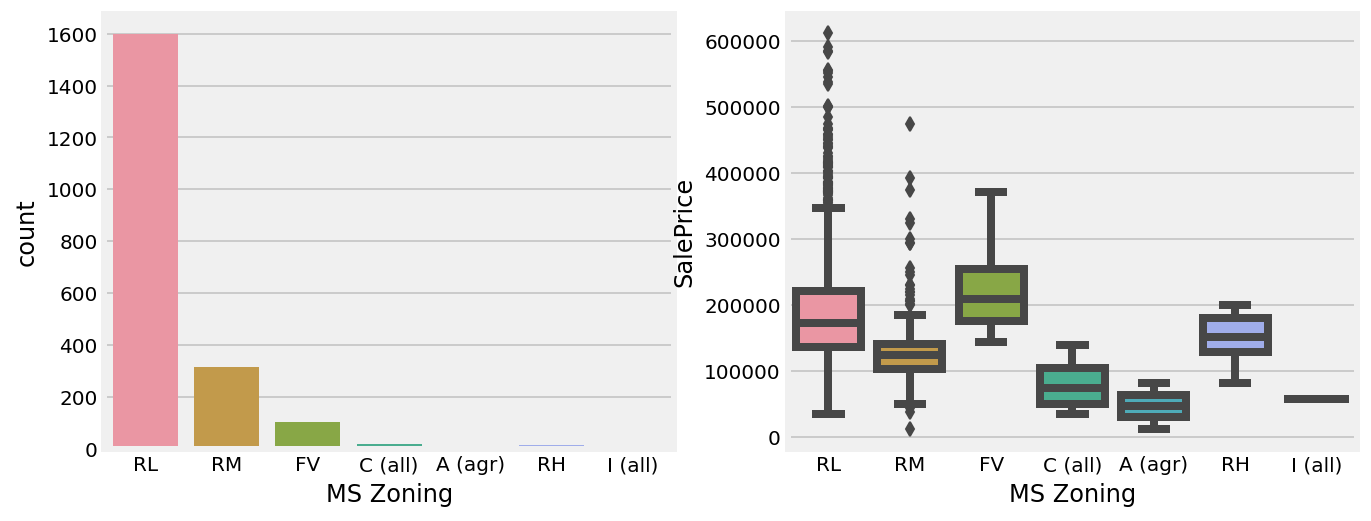

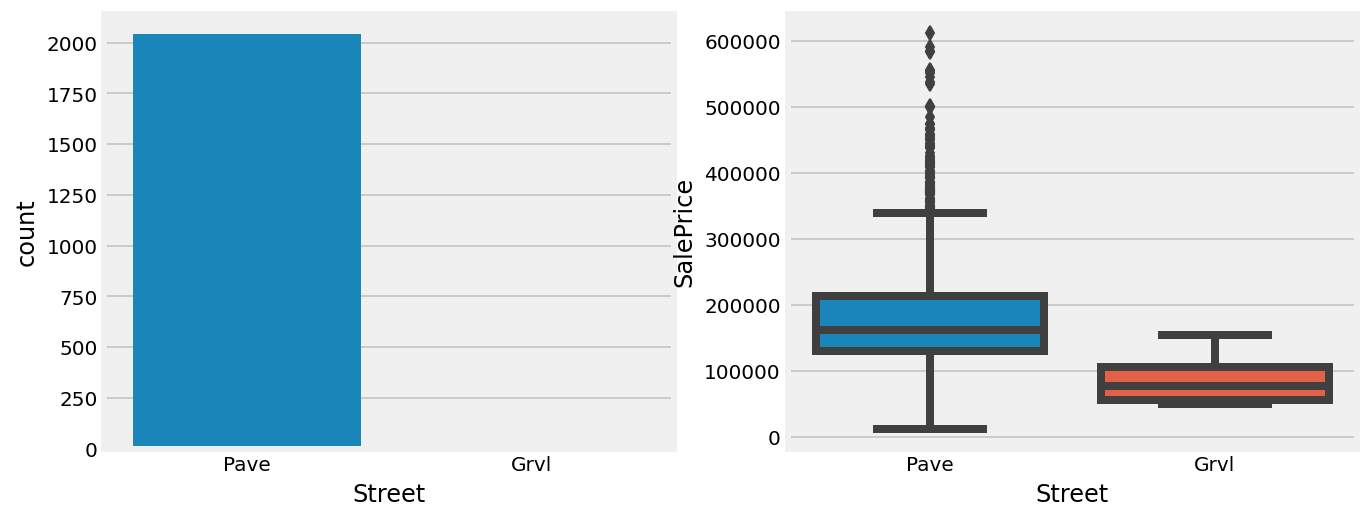

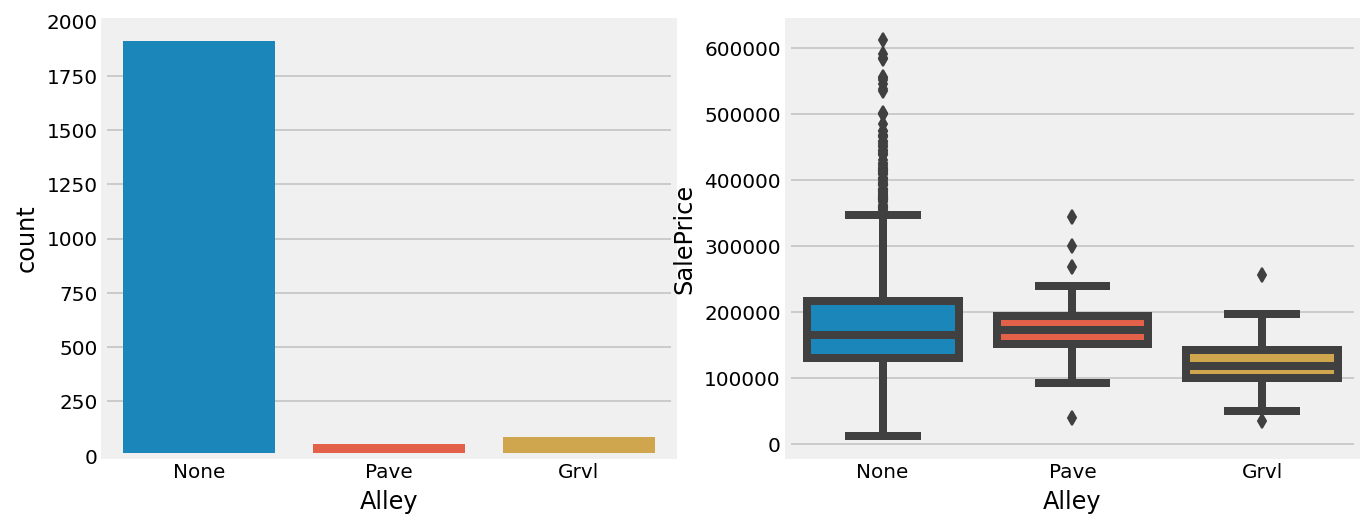

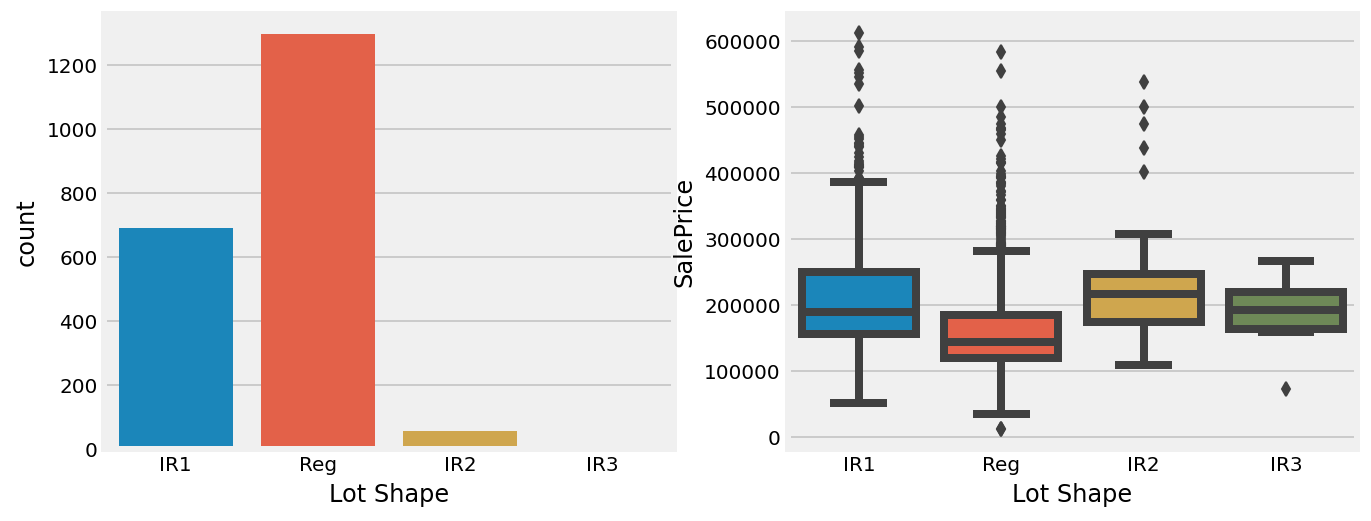

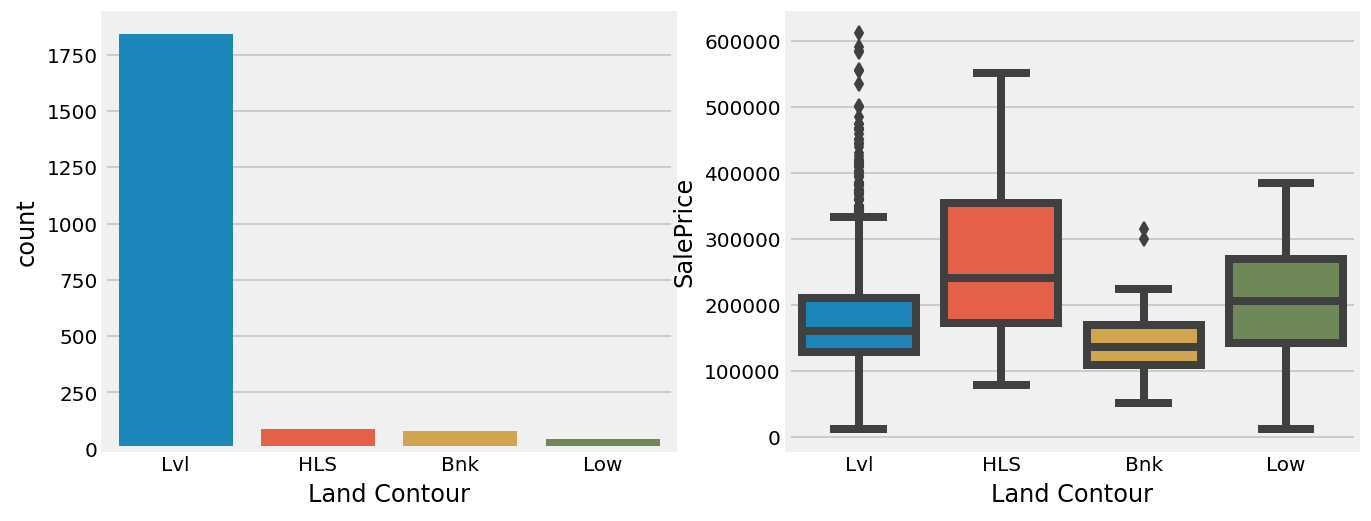

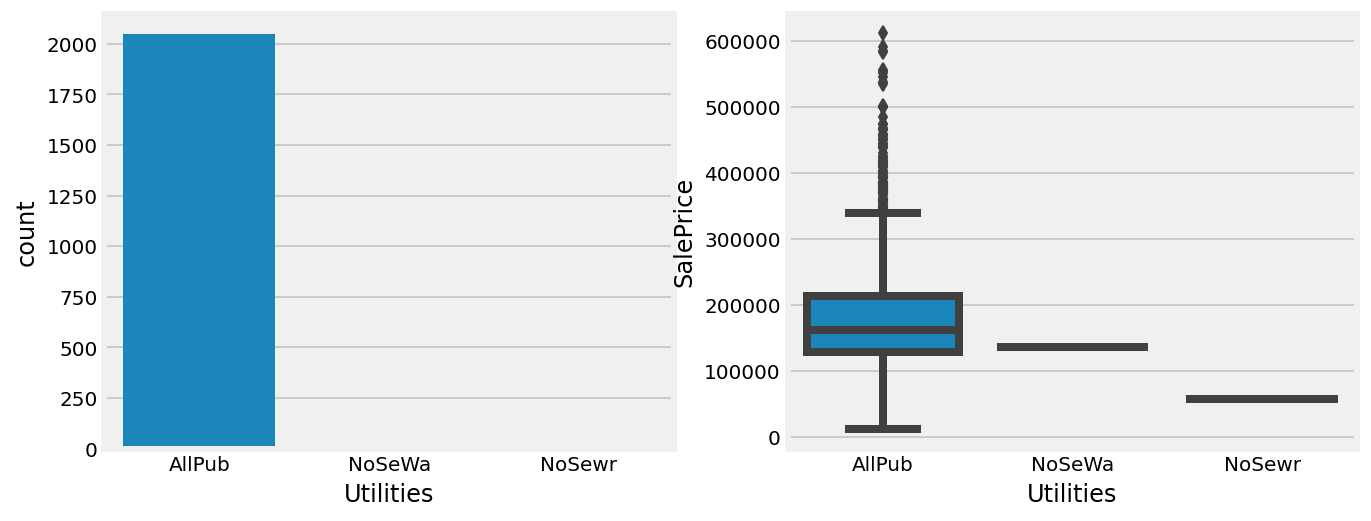

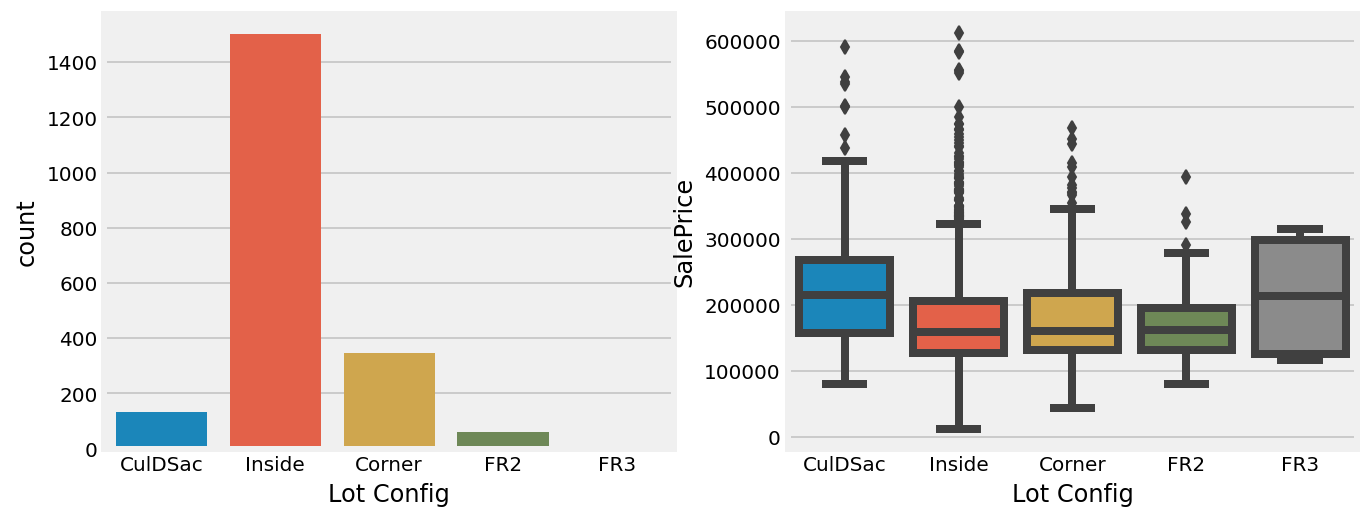

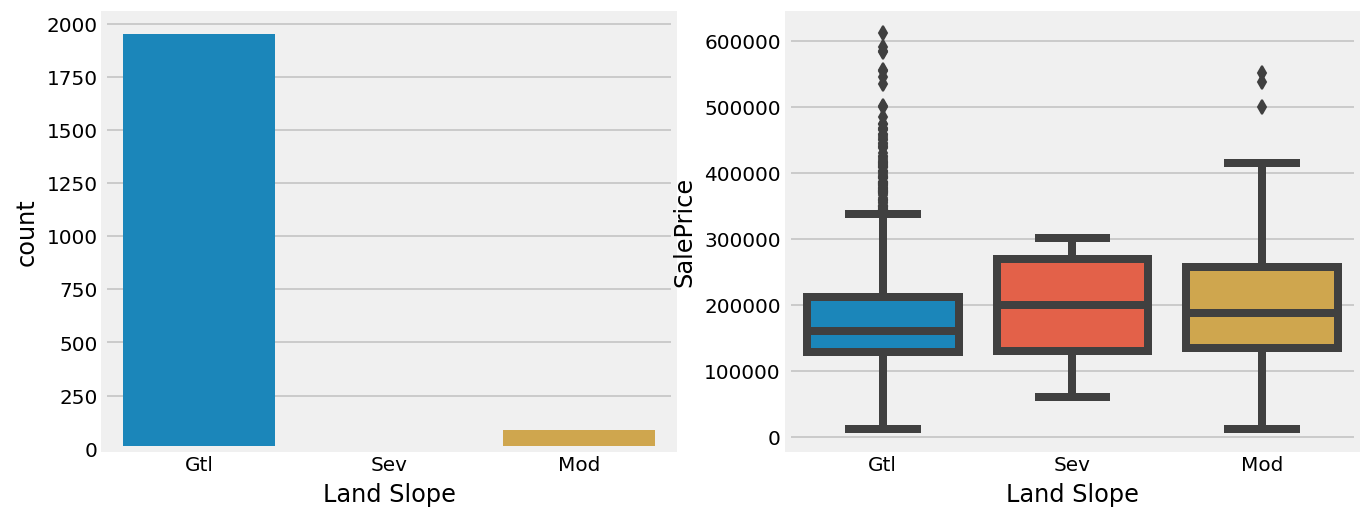

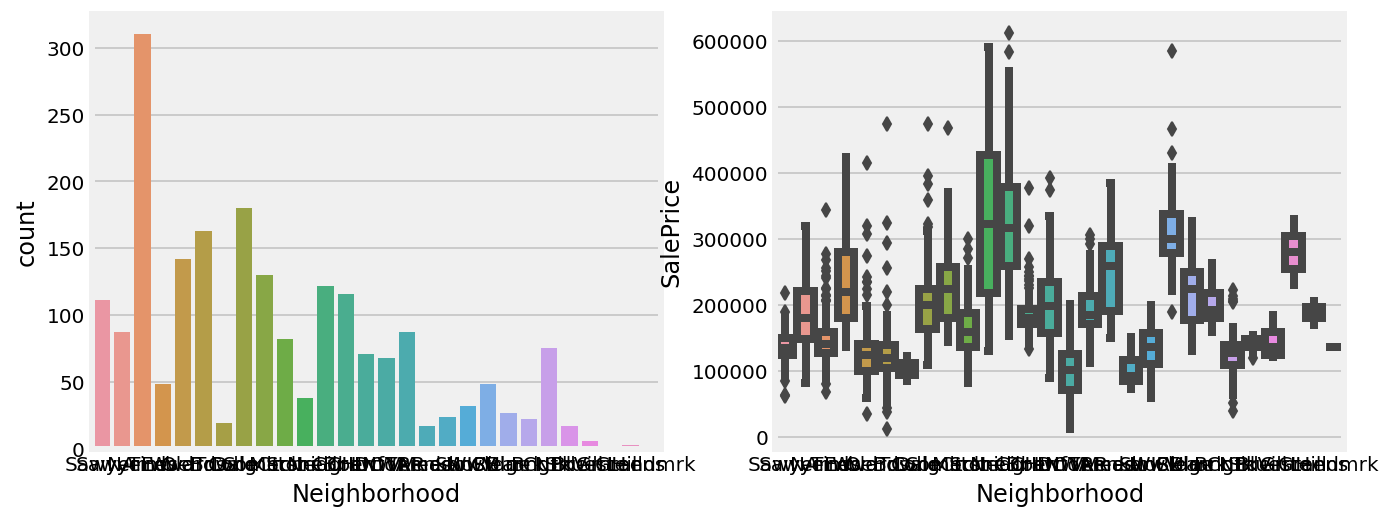

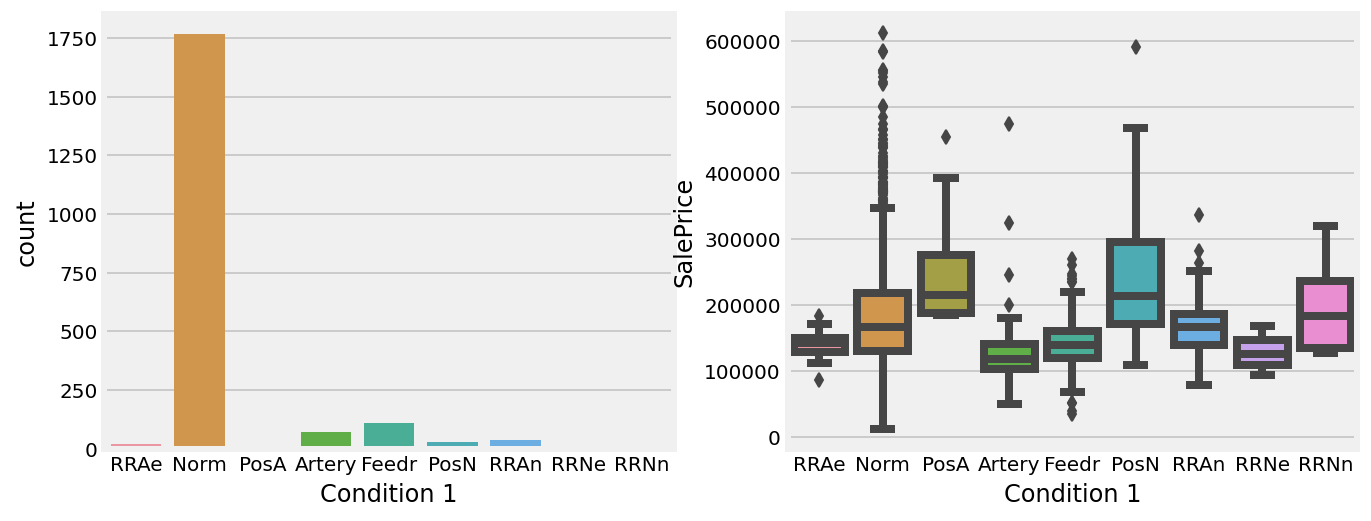

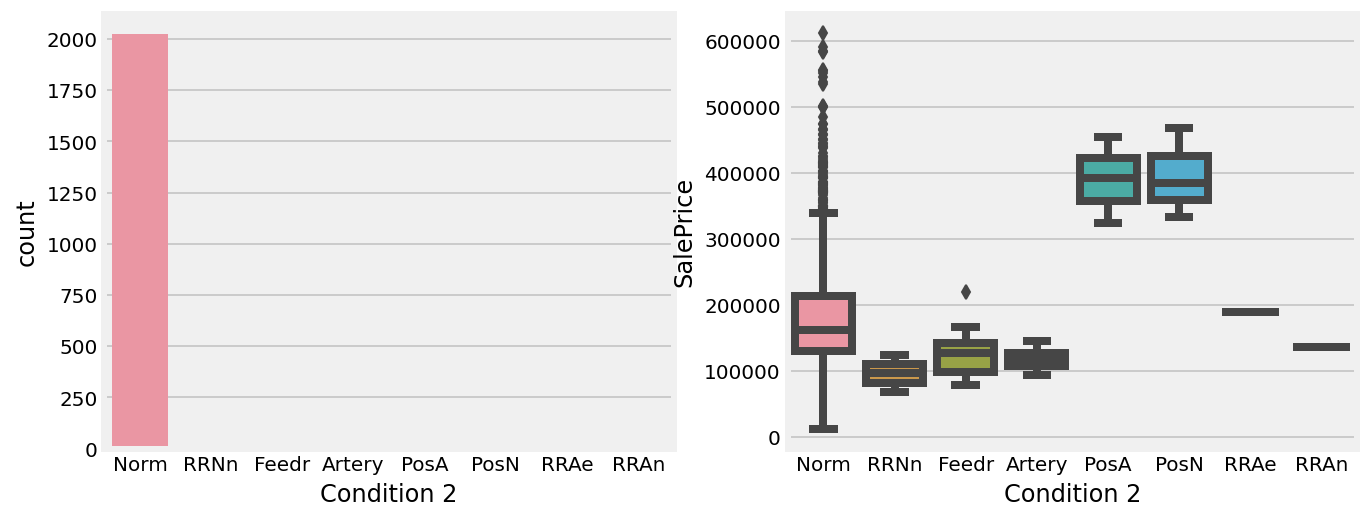

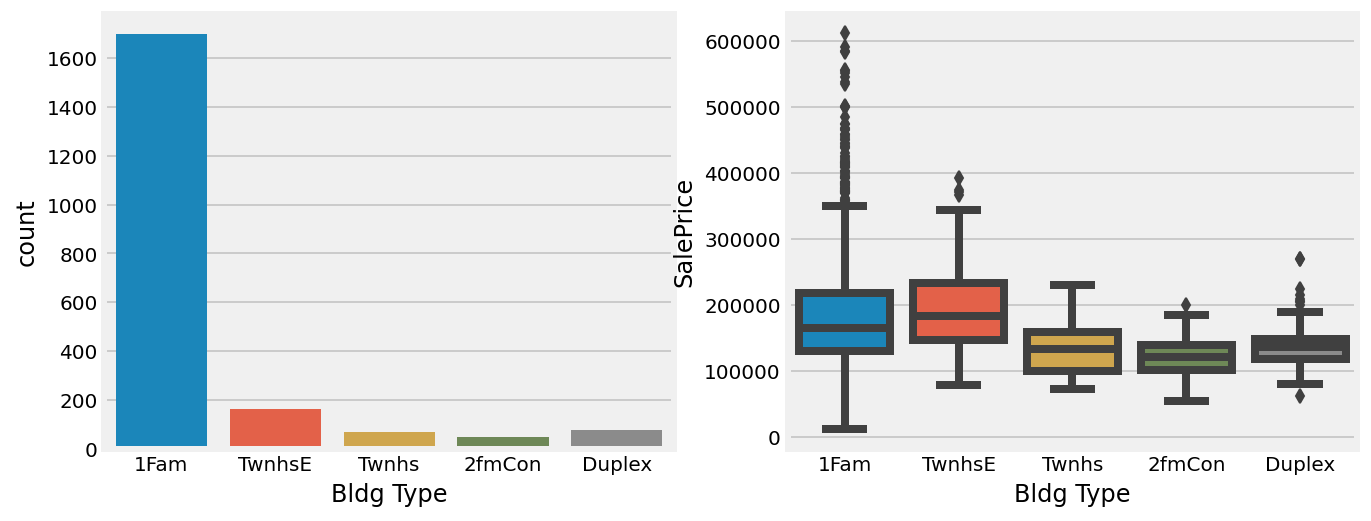

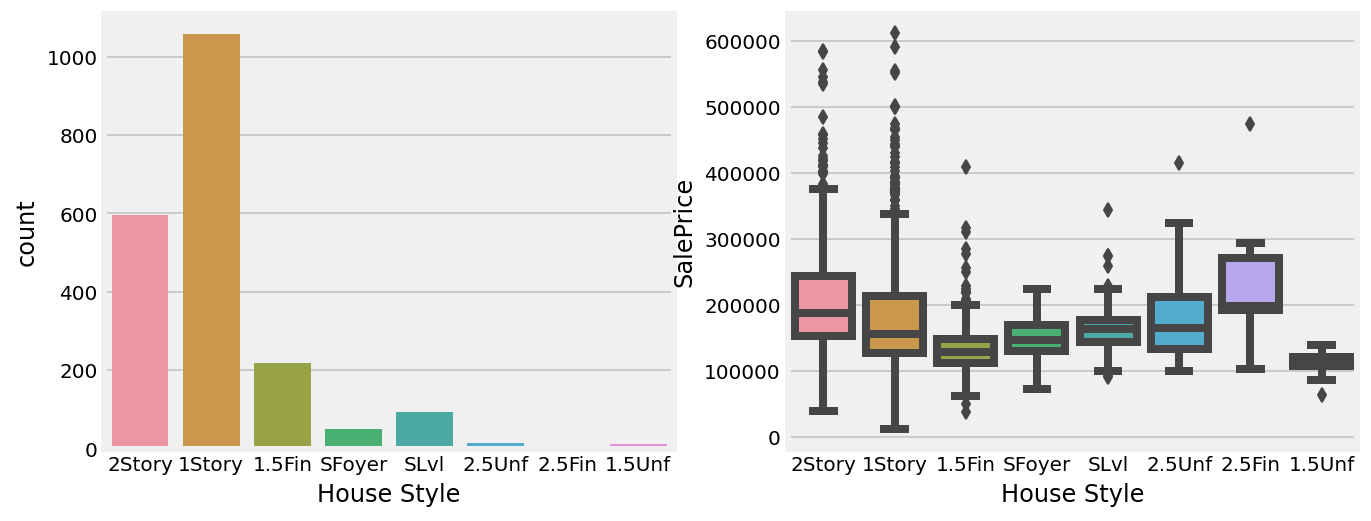

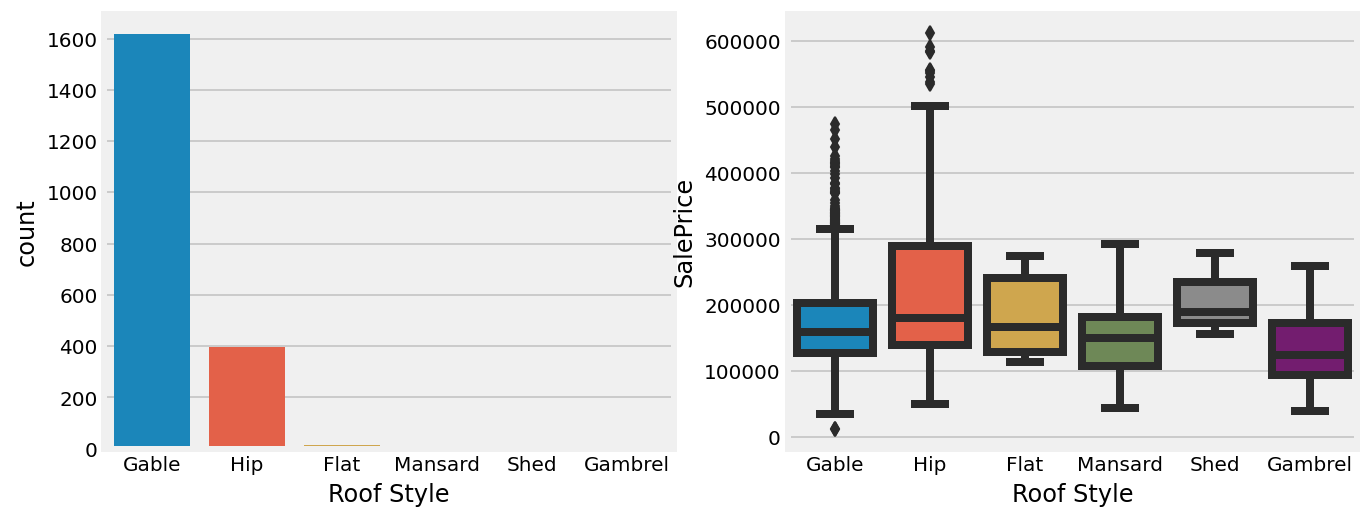

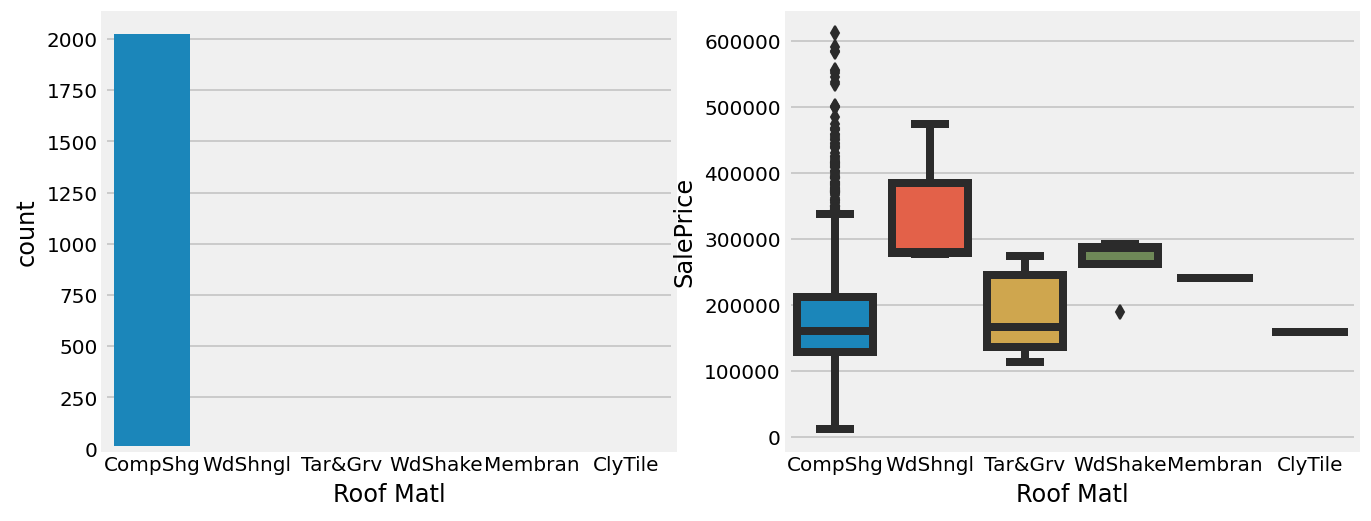

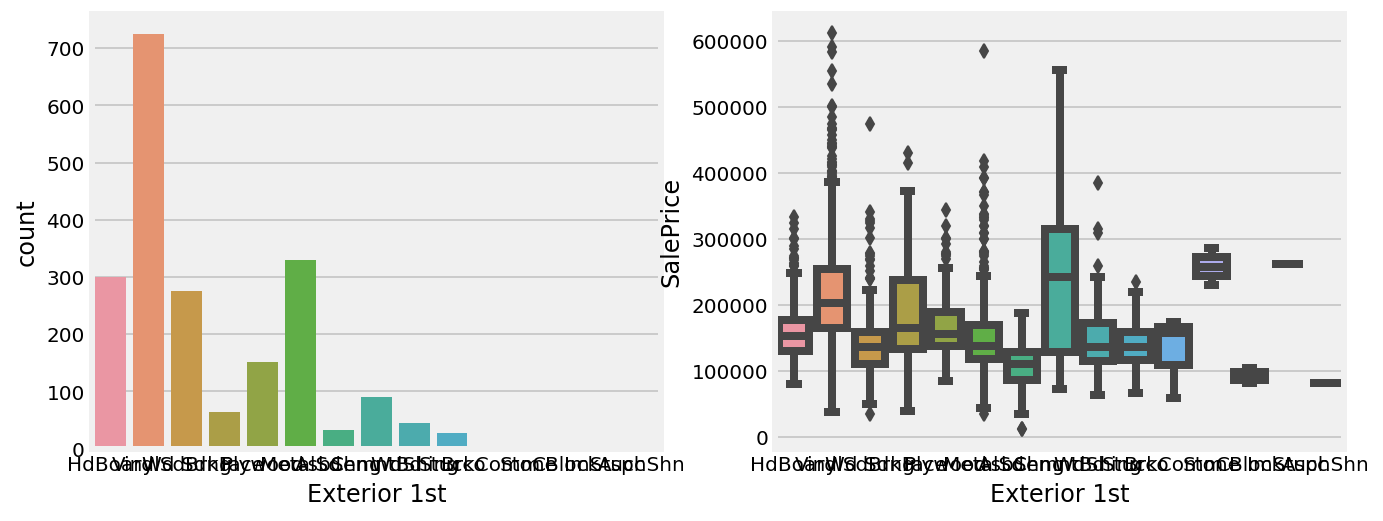

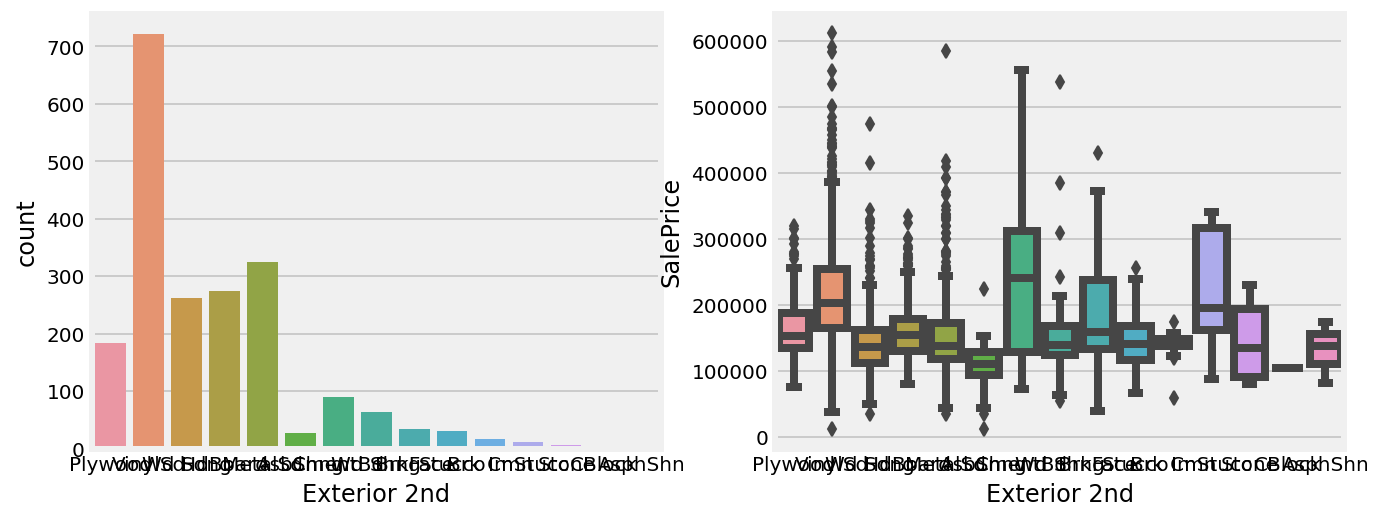

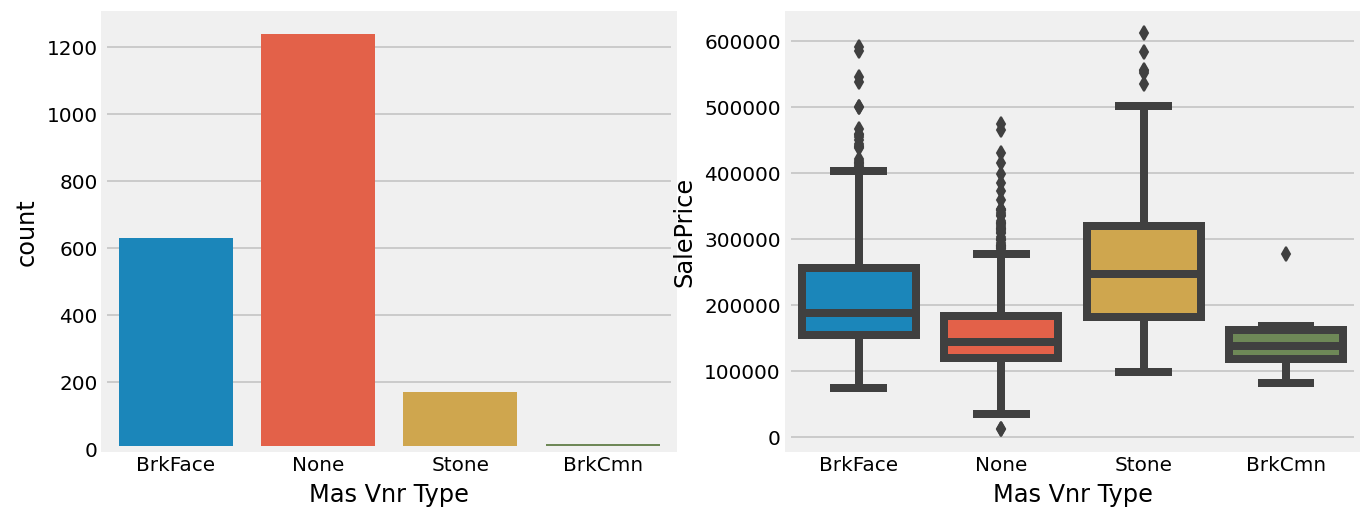

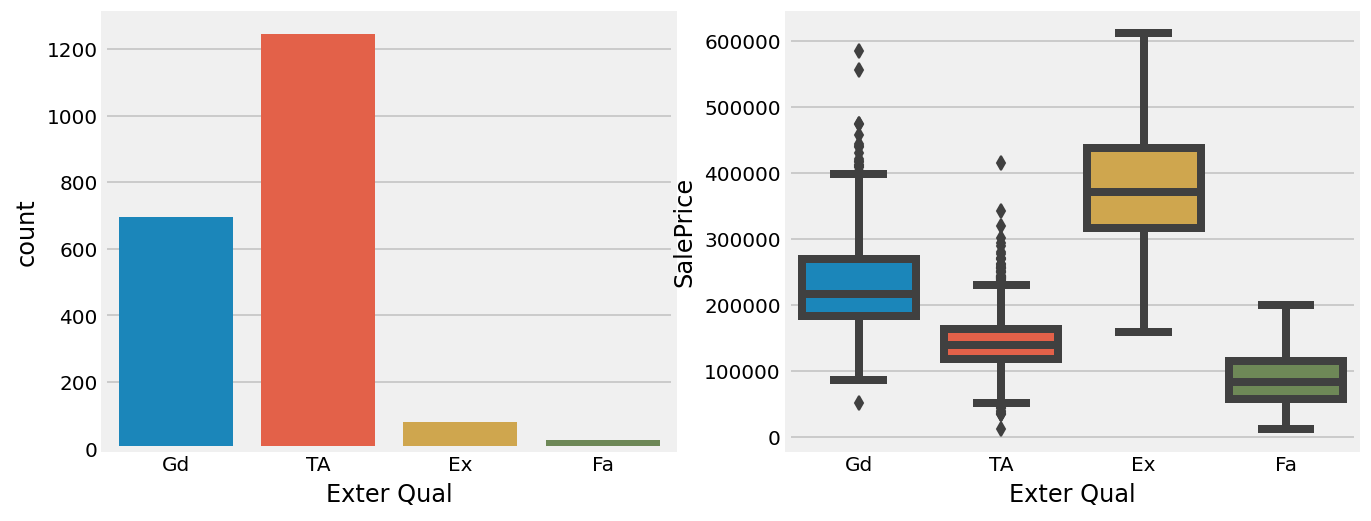

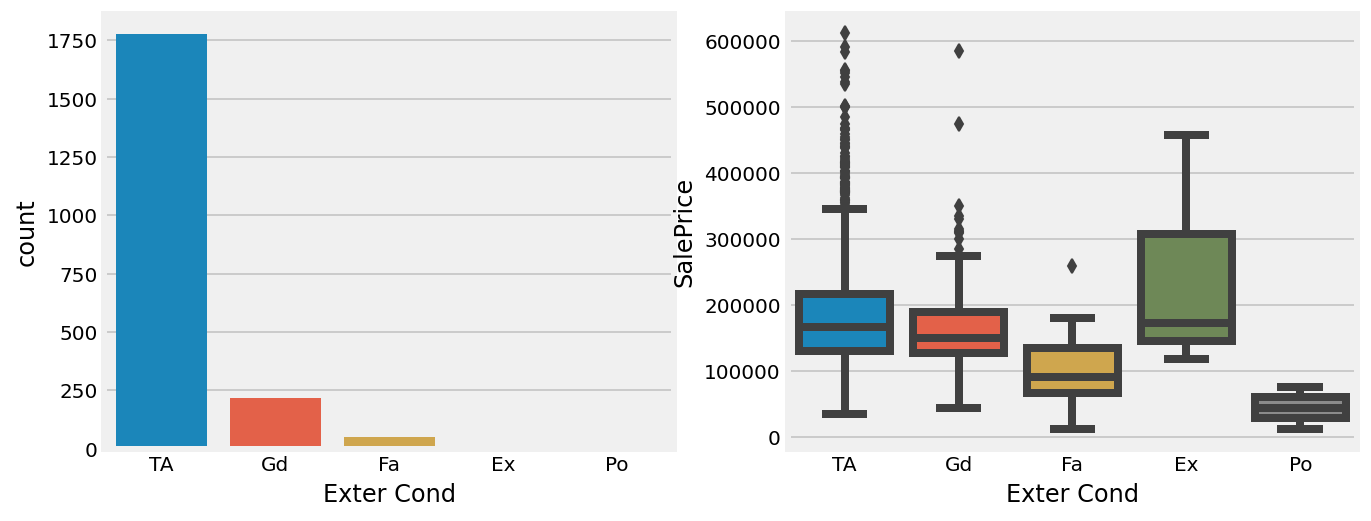

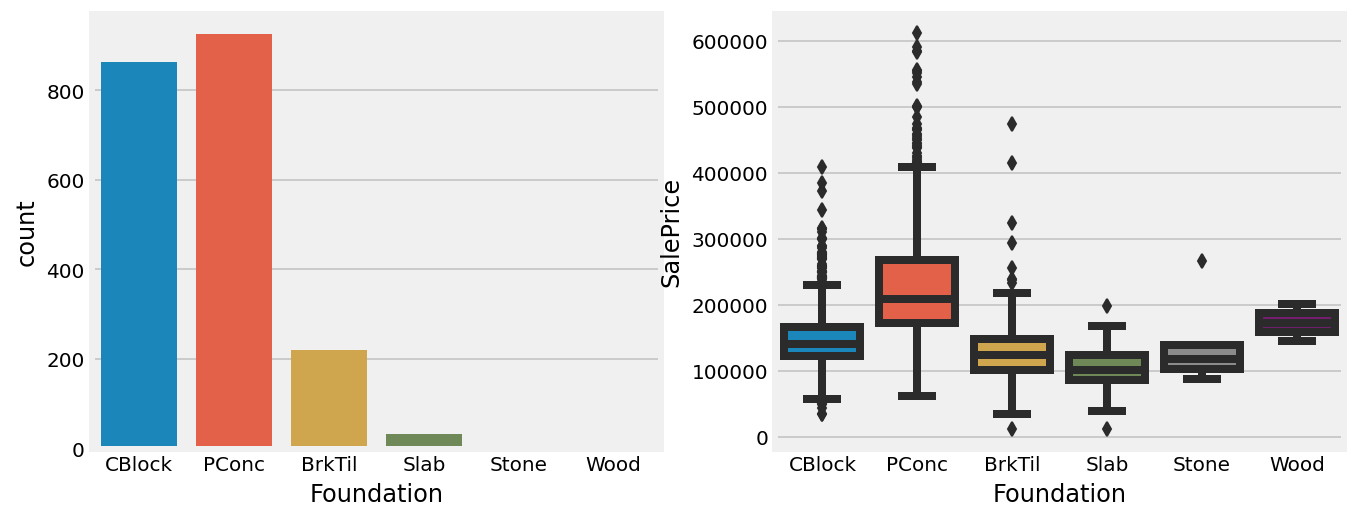

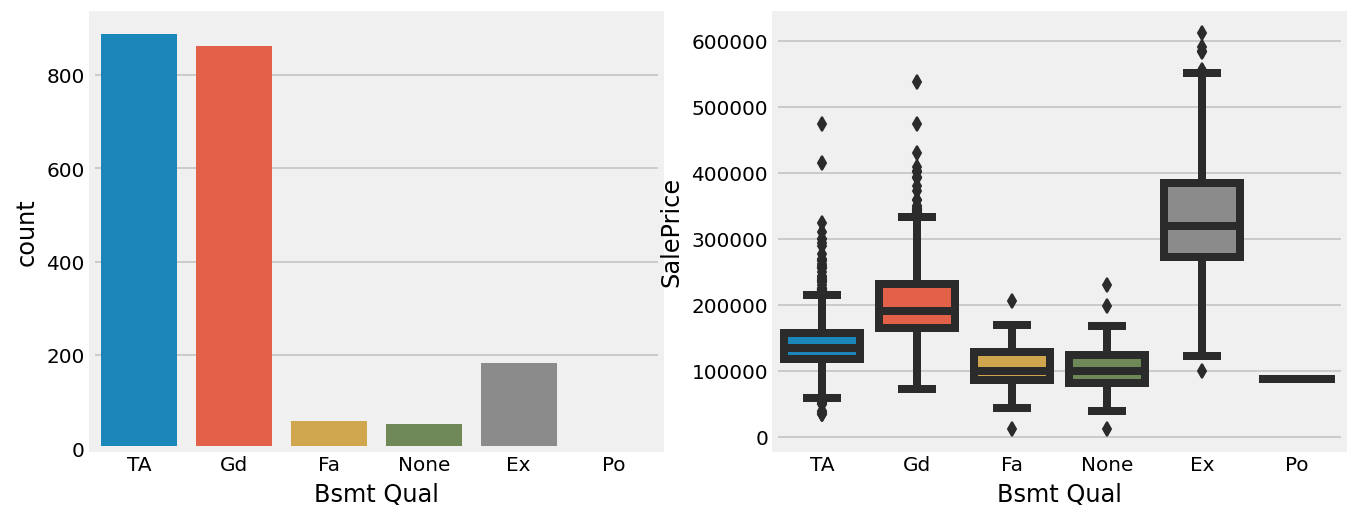

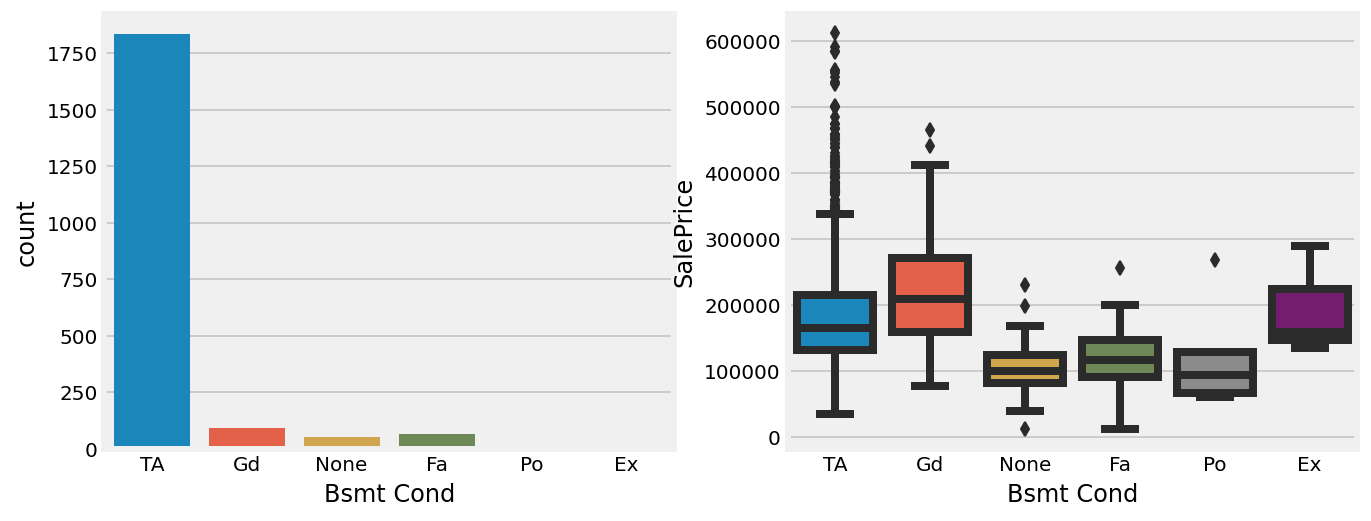

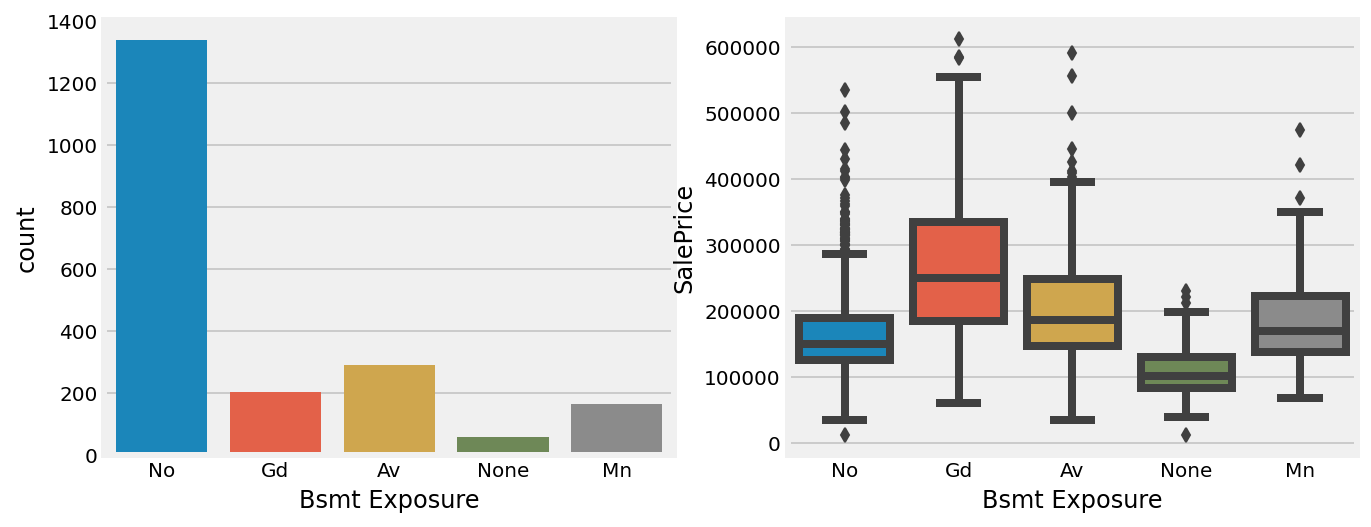

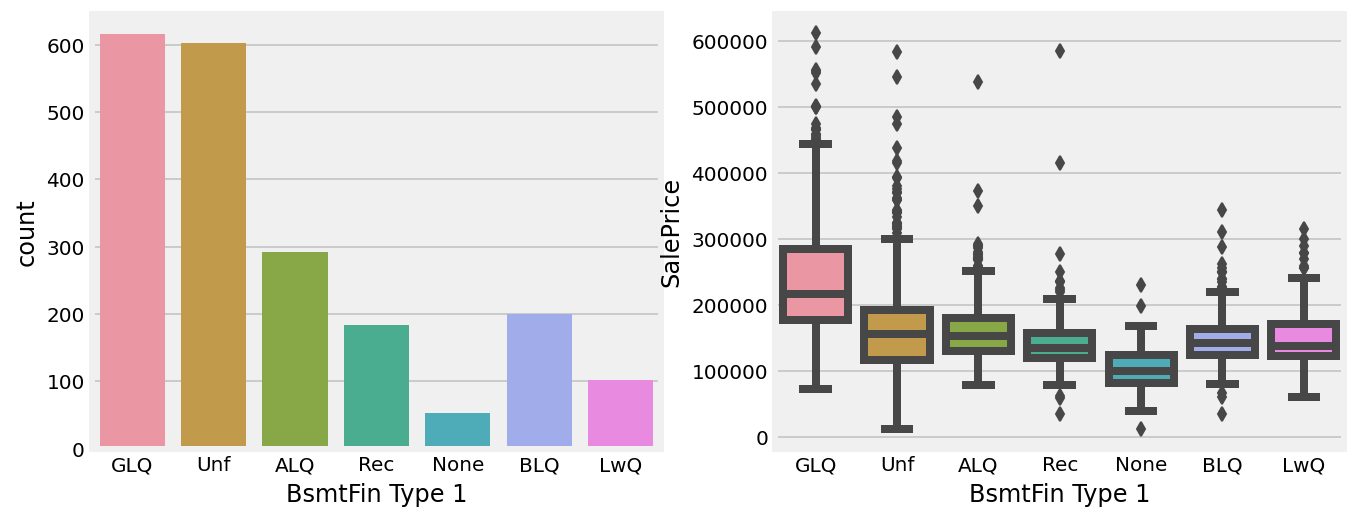

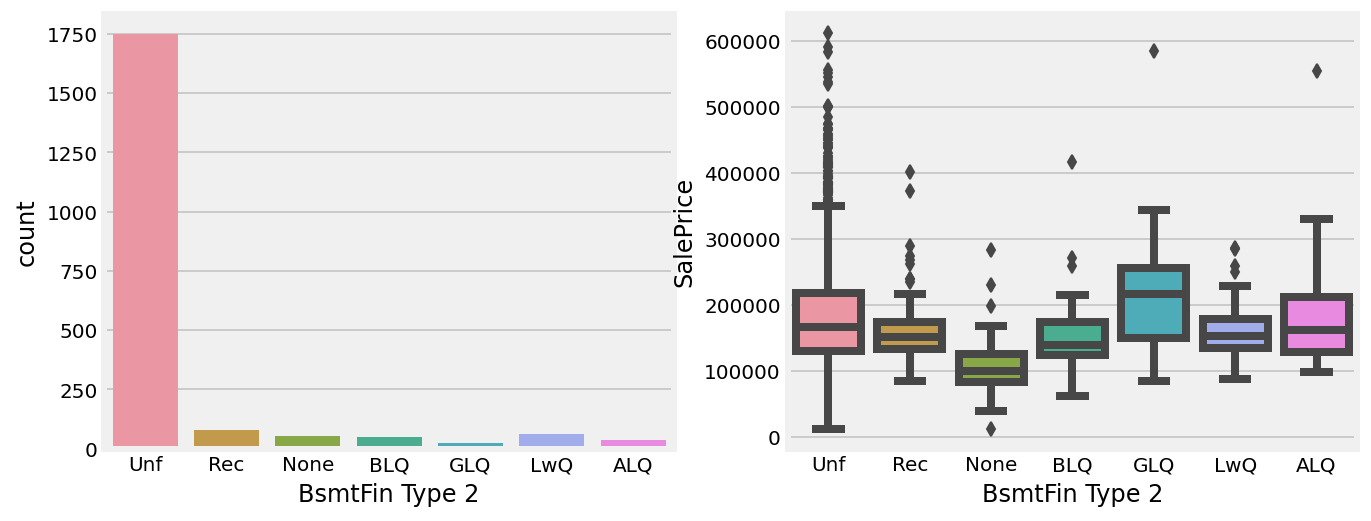

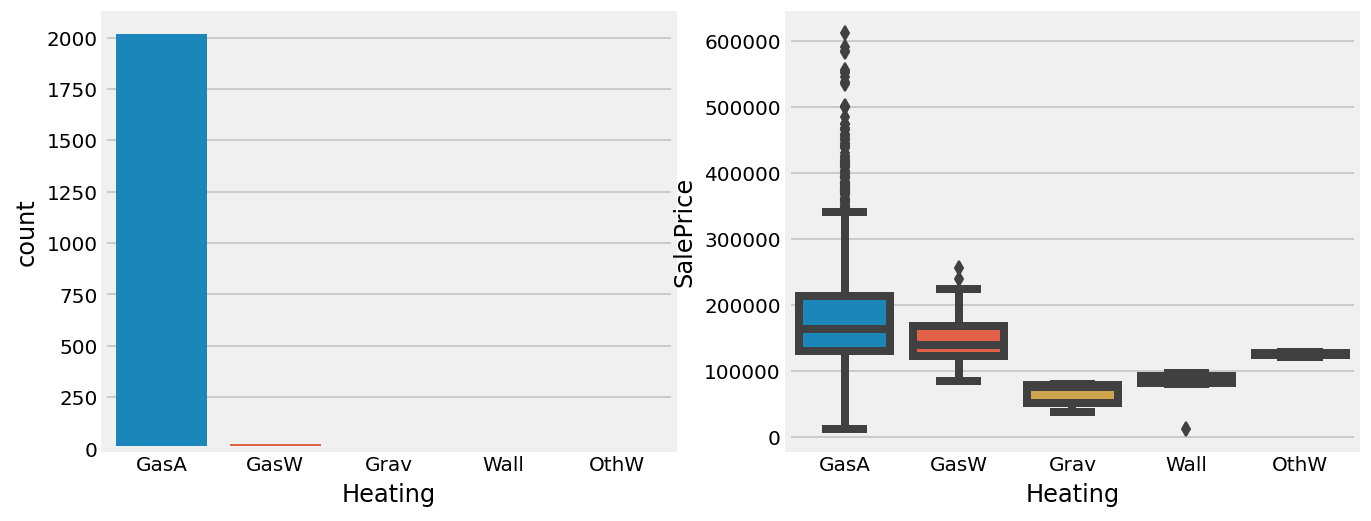

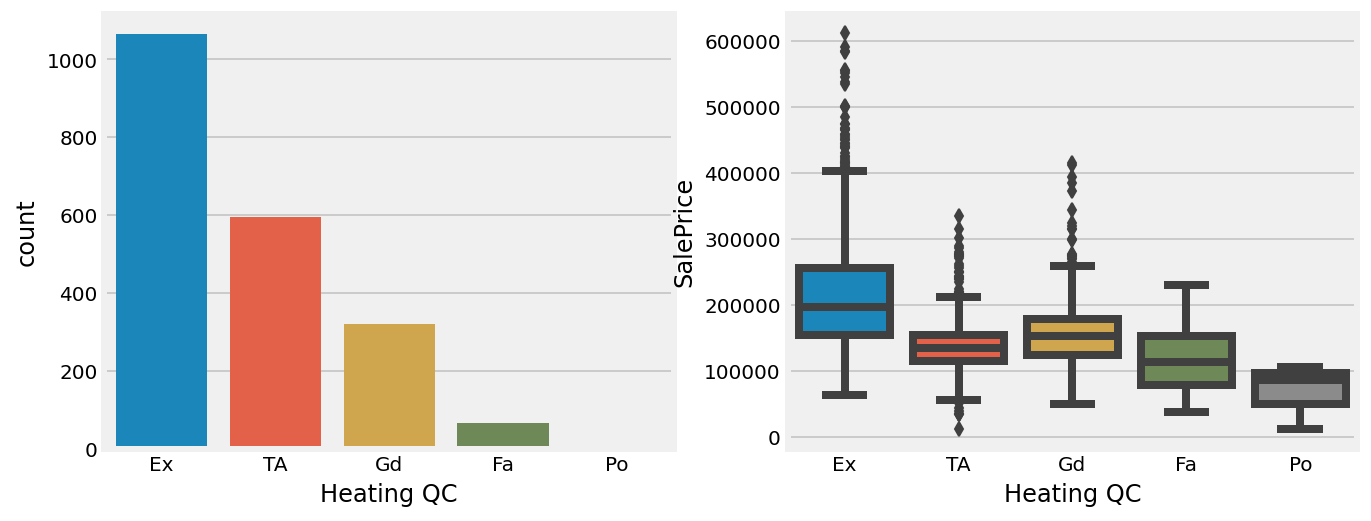

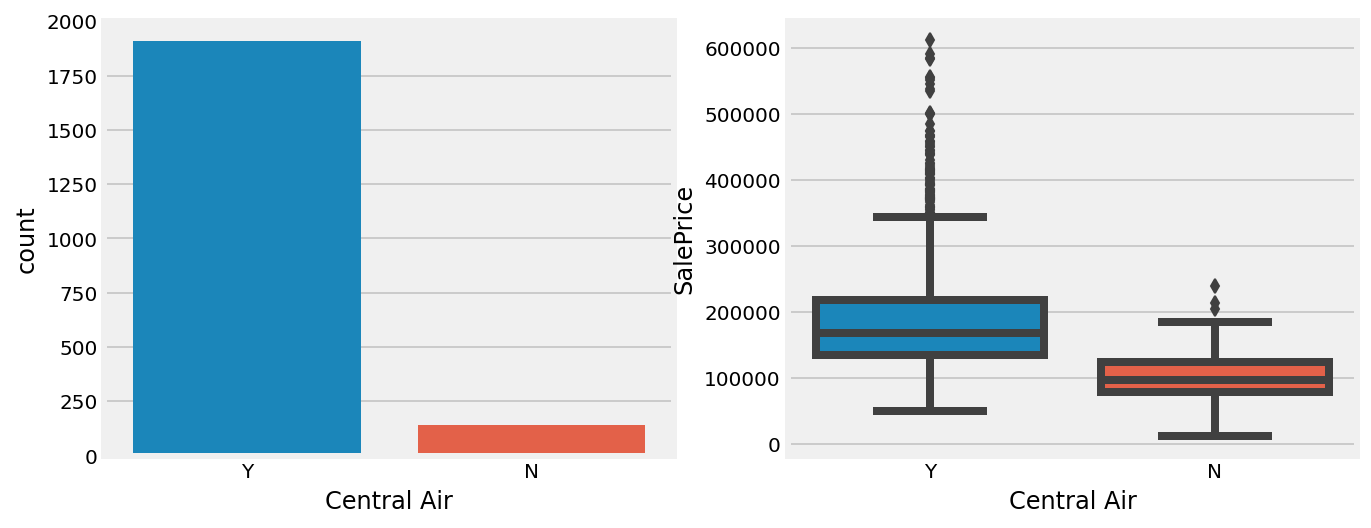

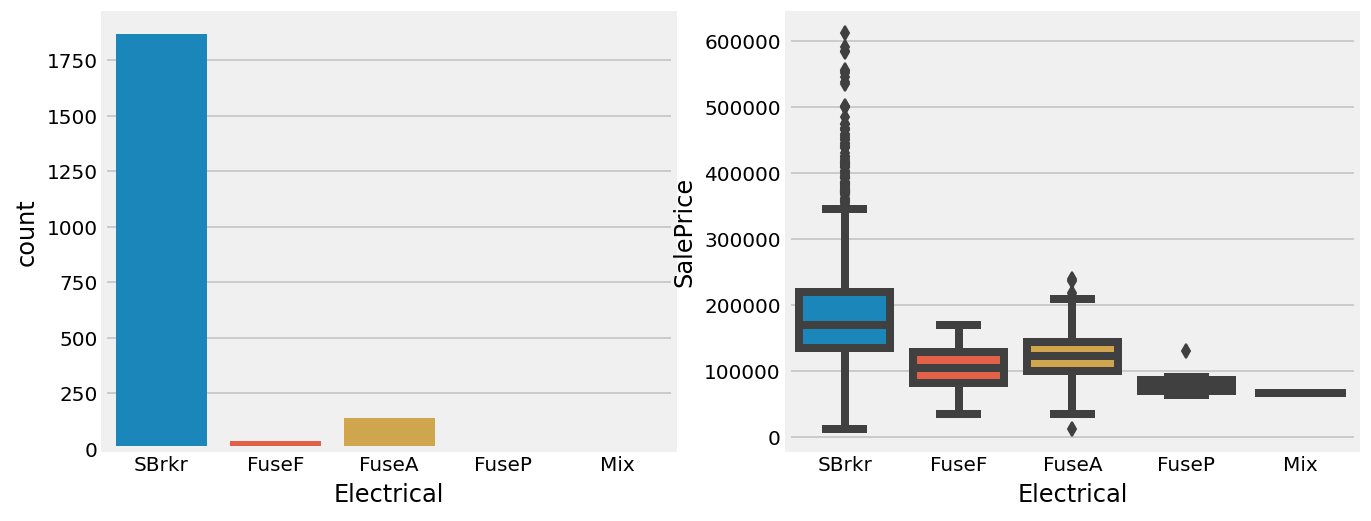

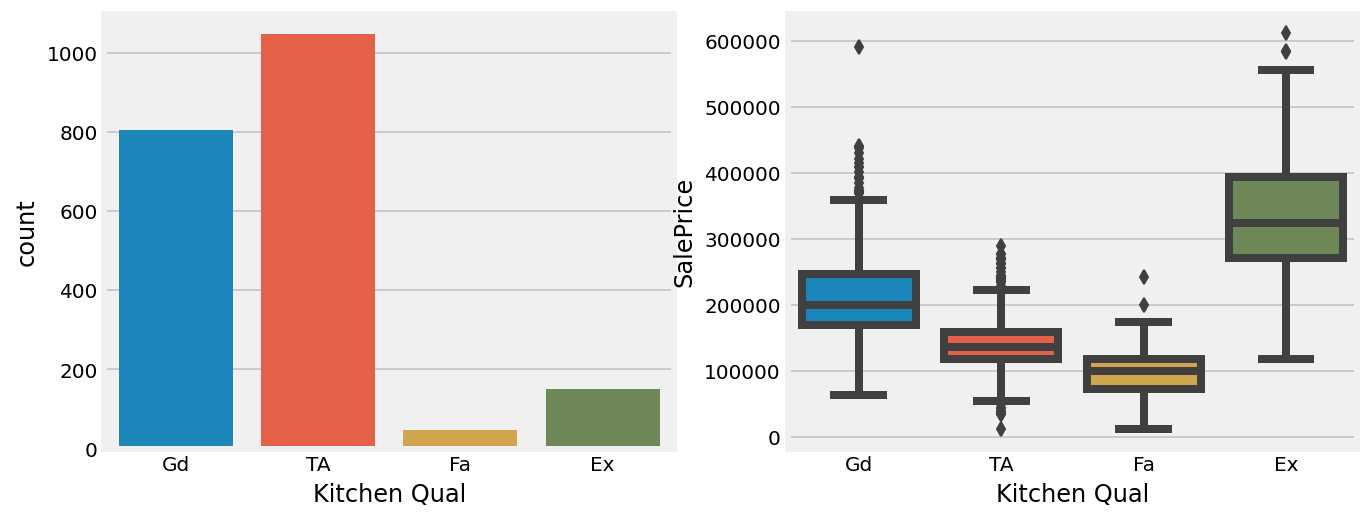

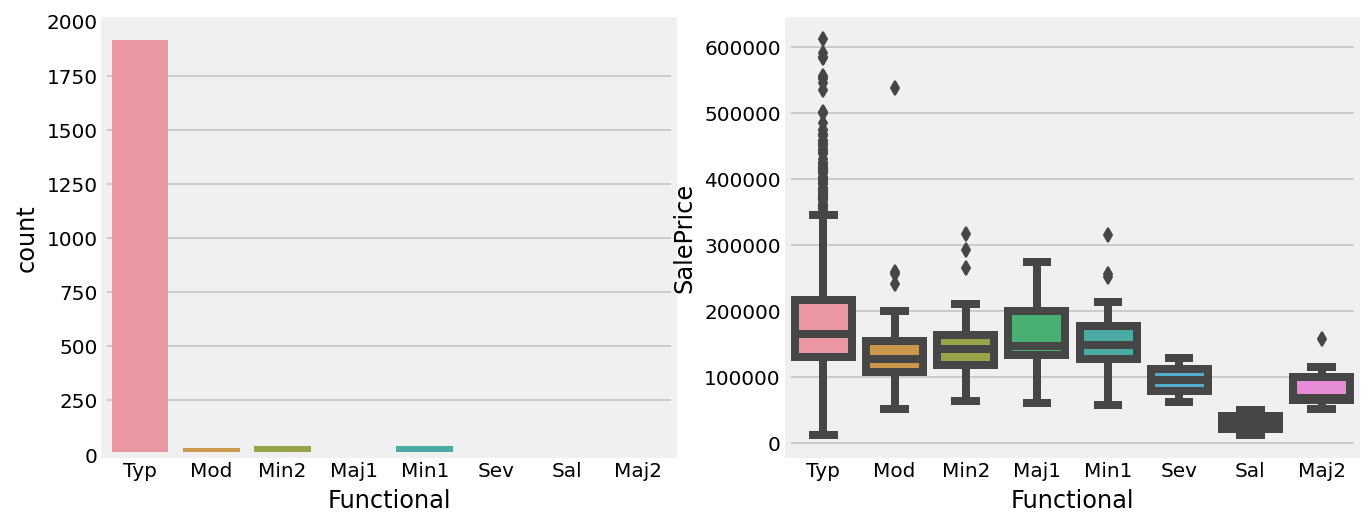

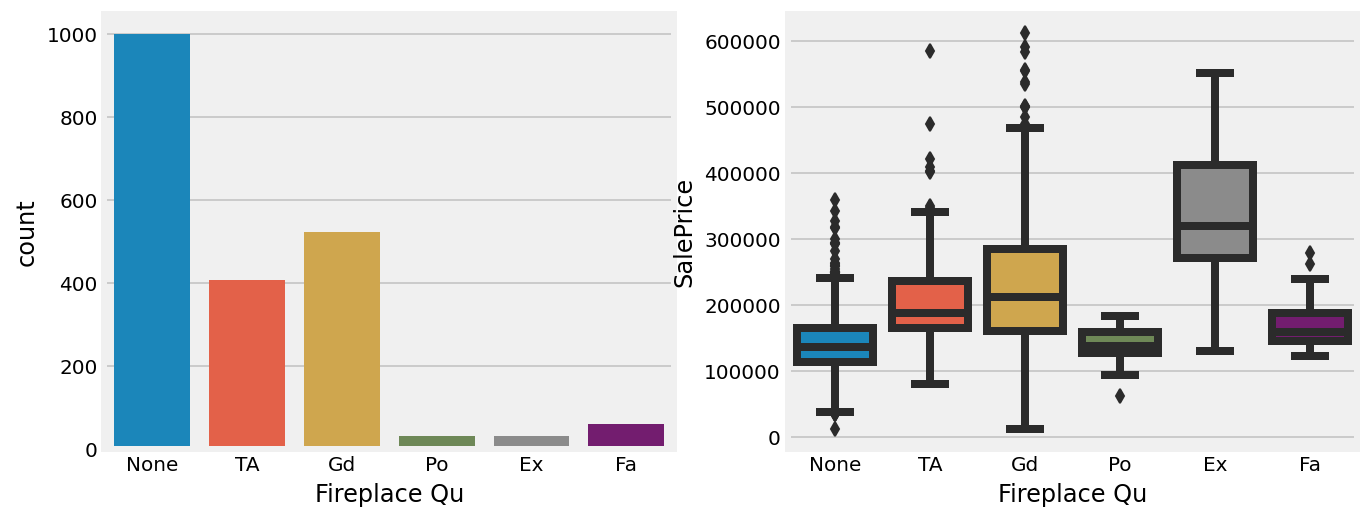

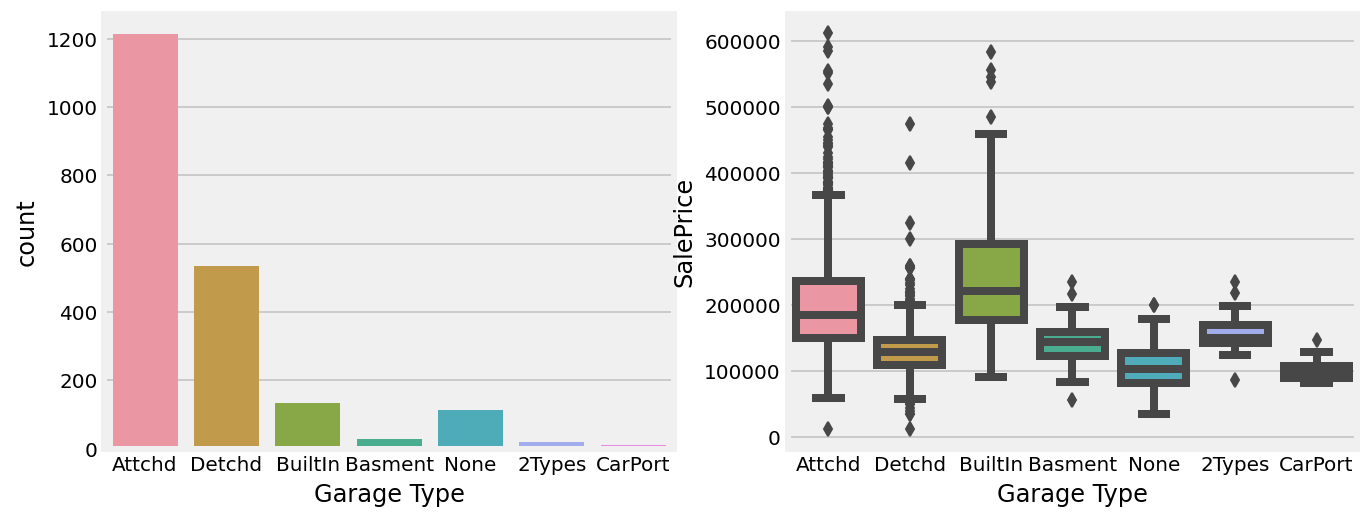

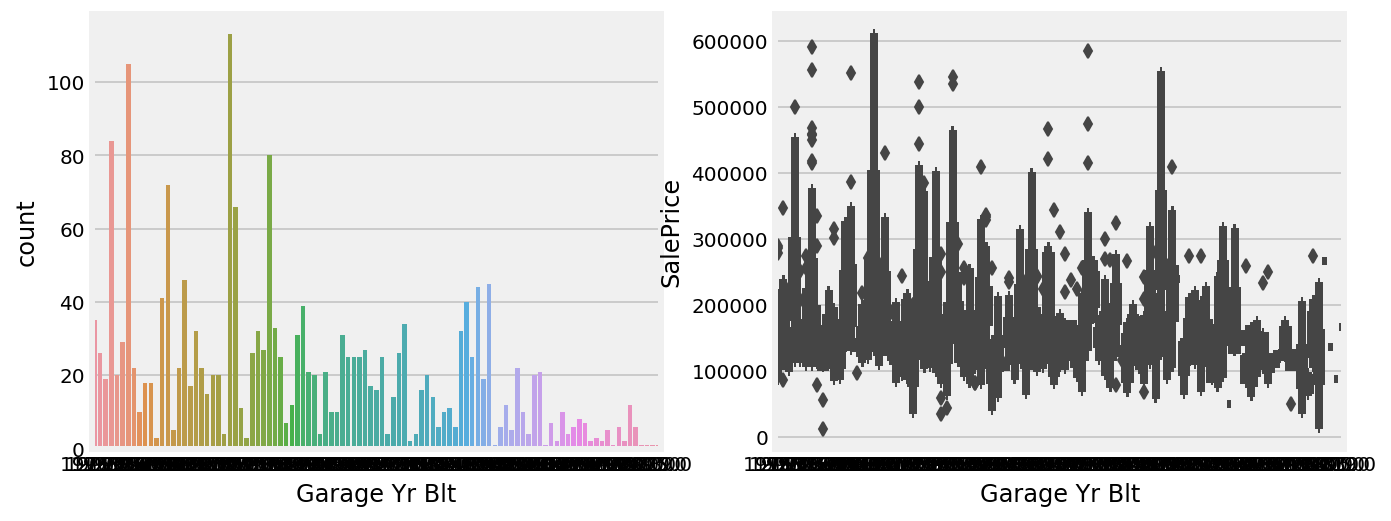

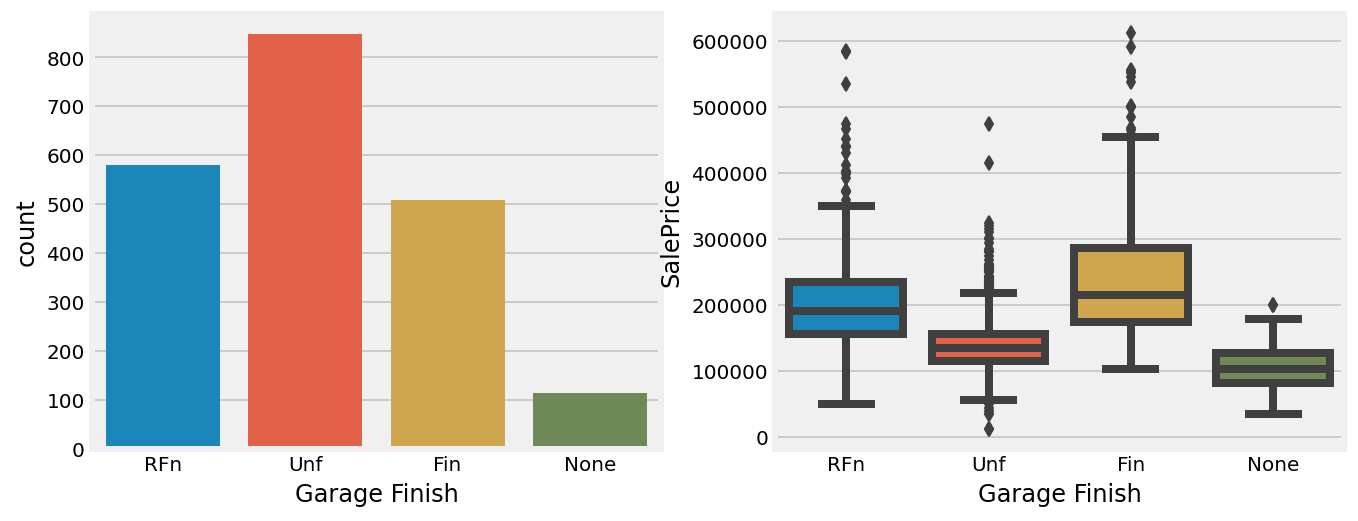

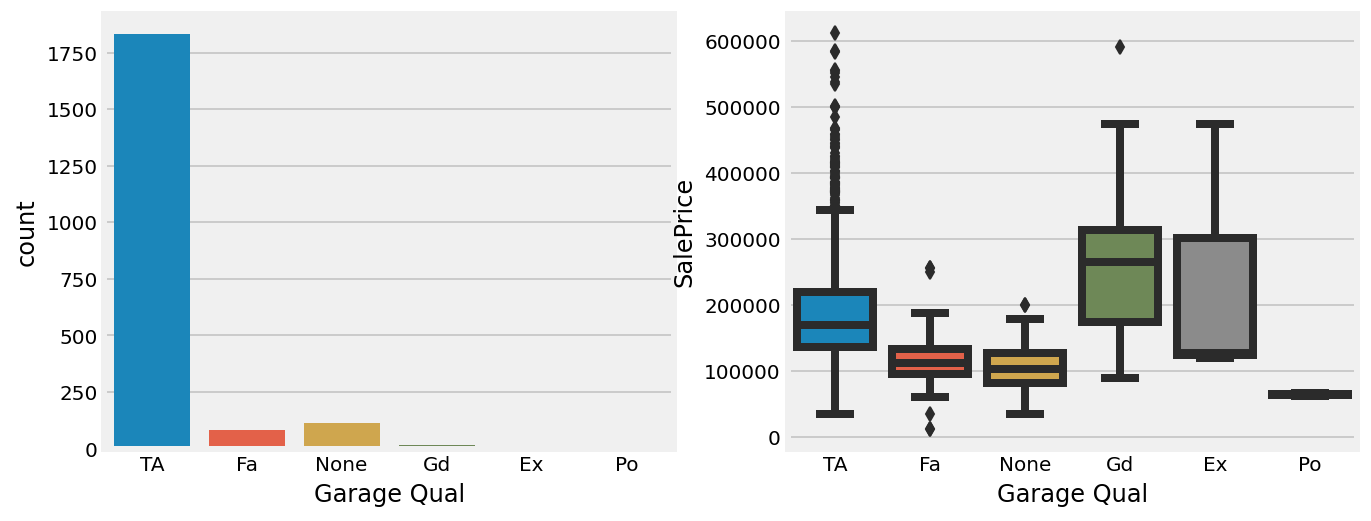

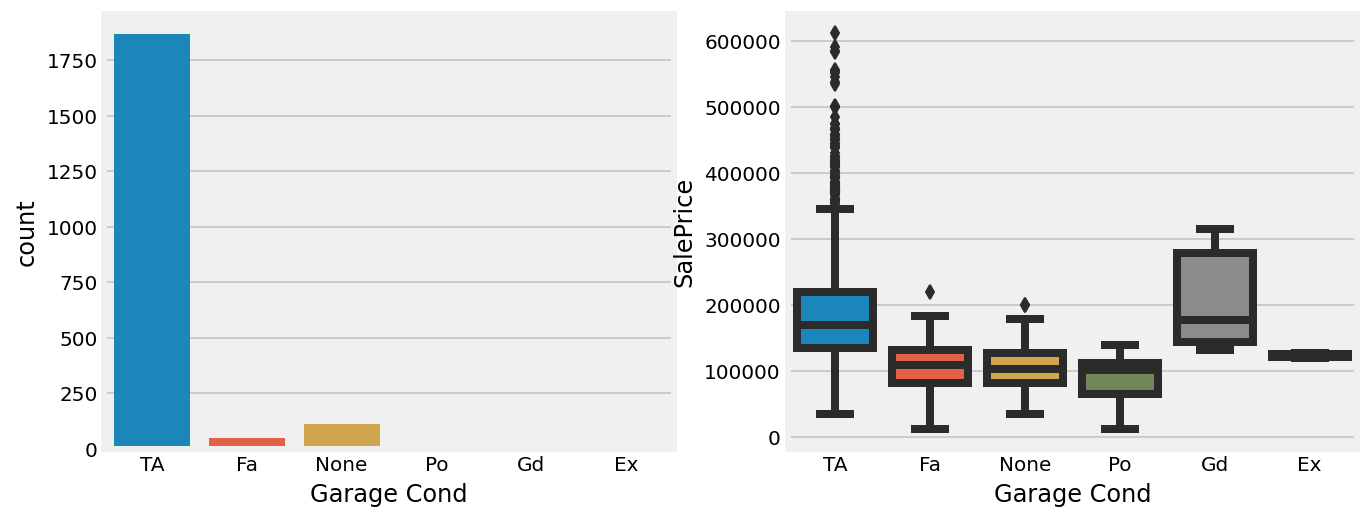

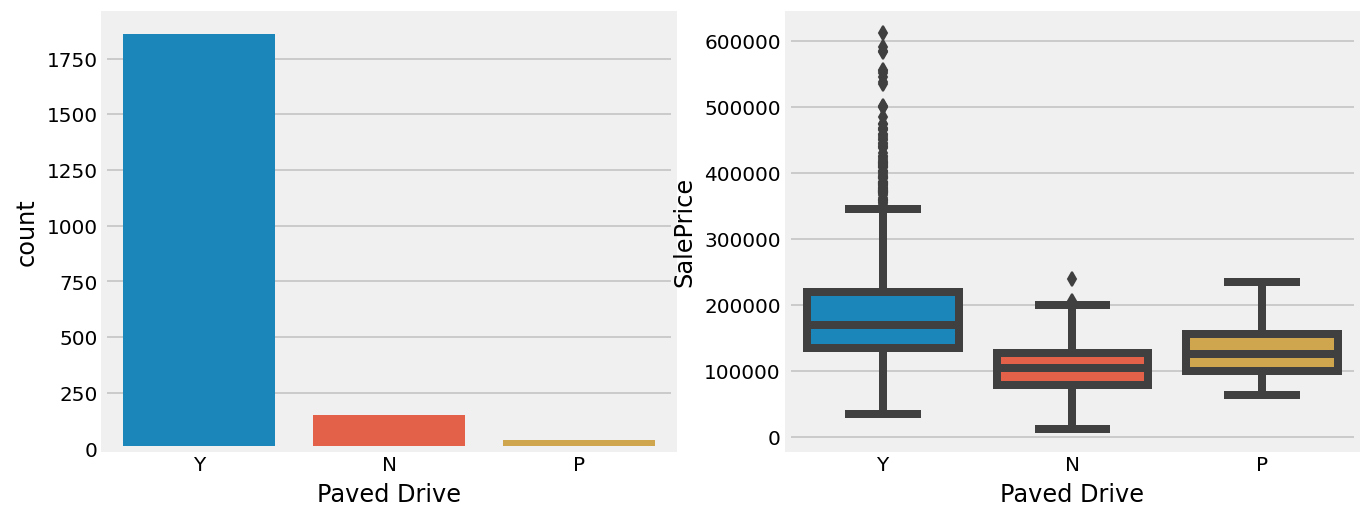

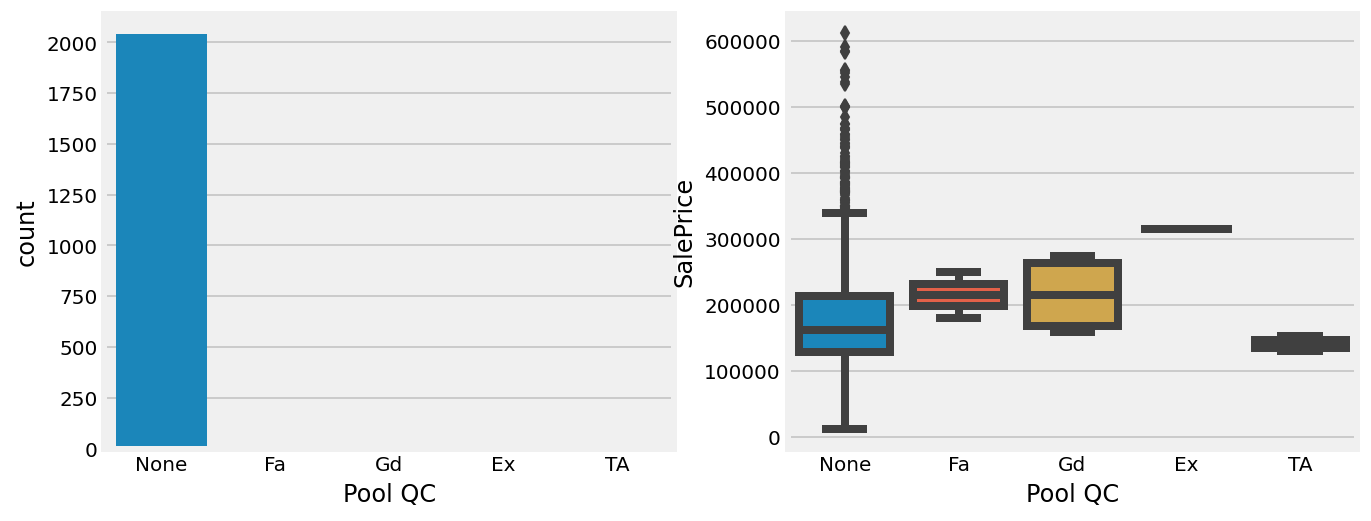

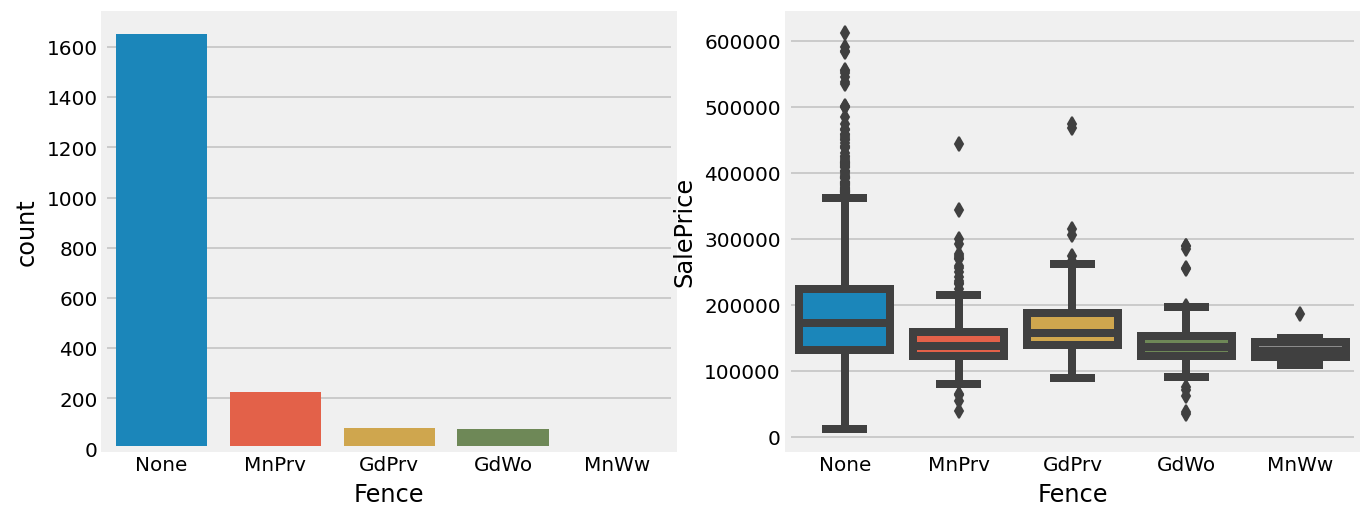

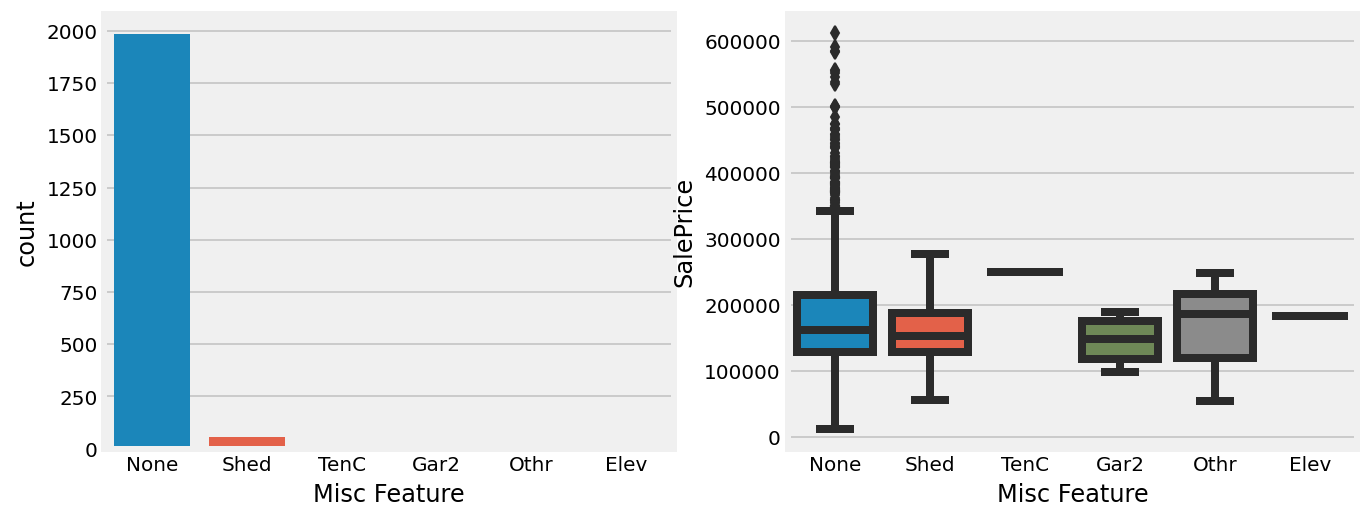

In [21]:
#Plotting subplots of the categorical columns. 
#countplots will be used to view the counts of each selection within a feature. 
#Boxplots will be used to view the how the different selections within a feature can have an impact on the sale price.

for i in object_cols.columns:
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    sns.countplot(data=train_data, x= i, ax=ax[0])
    sns.boxplot(data=train_data, x=i, y='SalePrice', ax=ax[1]);

### After viewing the countplots and boxplots, these are some decisions made on which categorical  variables to consider in predicting the housing prices, after taking into consideration the bar charts as well as the box plots.





Some of the categorical columns are dominated by a particular type (e.g. in street, and landcontour), with very little representation of the other categories.

| features | reasons for considering this variable |
| --- | --- |
| Neighborhood | The boxplots were able to show that the prices in different neighborhoods vary. The median housing price is much higher in certain neighborhoods as compared to others. Furthermore, the barcharts also show that all the neighborhoods were represented in training data. |
| Condition 1 | While most of the selections in the training data selected 'Norm', it was noticed in the boxplots that when other selections were chosen for example, 'PosN', it can affect the median pricing of the house.|
| Condition 2 | Same as condition 1, while most of the selections in the training data selected 'Norm', it was noticed in the boxplots that when other selections were chosen for example, 'PosN' a nd 'PosA', it can have a positive effect in increasing the median pricing of the house. |
| Kitchen Qual | While most of the kitchens fall under 'Gd' and 'TA', the kitchens under 'Ex' can shift the sales prices much higher. The 25th percentile of the 'Ex' kitchens is already higher than the 75th percentile of 'Gd' kitchens.|
| Fireplace Qu | Through the boxplots, it is observed that different selections under fireplace quality can have a positive impact on the sale price of housing even though more of the houses in the training data do not have fireplaces.|
| Garage Type |Built in garages generally have higher sale prices as compared to other selections according to the box plots.  |
| Garage Qual| Even though most of the counts for garage quality fall under 'typical/ average', the quality of the garage strongly affects the sales prices as seen in the box plots. |
|Pool QC|The boxplots show that the pool quality has an impact on the sale prices. Even though not all houses have pools, the median prices of the houses are much higher for pools with good or excellent ratings. |

In [22]:
top_cat = train_data[['Neighborhood', 'Condition 1', 'Condition 2', 'Kitchen Qual', 'Fireplace Qu', 'Garage Type',\
                      'Garage Qual', 'Pool QC']]
top_cat.head()

,Neighborhood,Condition 1,Condition 2,Kitchen Qual,Fireplace Qu,Garage Type,Garage Qual,Pool QC
0,Sawyer,RRAe,Norm,Gd,None,Attchd,TA,None
1,SawyerW,Norm,Norm,Gd,TA,Attchd,TA,None
2,NAmes,Norm,Norm,Gd,None,Detchd,TA,None
3,Timber,Norm,Norm,TA,None,BuiltIn,TA,None
4,SawyerW,Norm,Norm,TA,None,Detchd,TA,None
